# Neale diseases genes (Pascal) and vascular phenotypes genes (Pascal)
## Unfinished!

###### First version 17/06/2022
###### Latest modif 22/12/2022

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
from matplotlib.colors import LogNorm, Normalize

DATE = datetime.now().strftime("%Y-%m-%d")

In [4]:
p_value_min = 5.7  # -math.log10(0.05/len(x))
ventile_num='Zekavat'
#date_used='2022_11_23' #'2022_08_17'
#directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/'+str(date_used)+'_'+str(ventile_num) +'/'
directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/genes_diseases/'
directory_diseases_neale_pascal = '/HDD/data/ukbb/disease_sumstats/VARIANTS/'
#'/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/'  #2022_11_23_covar_fix/'
#save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/genes_diseases/'

MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
all_files = list(MAIN_LABELS.split(","))
all_files_new = list(MAIN_NAMES.split(","))


path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'


### Read from csv
file_info_name='pheno_diseases_info.csv'

df_inf_csv = pd.read_csv('~/retina-phenotypes/complementary/'+ file_info_name)
print('len(df_inf_csv):', len(df_inf_csv))
df_inf_filt =  df_inf_csv[df_inf_csv['lscr_analysis'] == 'TRUE']
print('len(df_inf_filt):', len(df_inf_filt))
diseases_traits_old = list(df_inf_filt['datafield'].values)
diseases_traits_new = list(df_inf_filt['final_name'].values)


len(df_inf_csv): 89
len(df_inf_filt): 24


In [5]:

#type_phenots='main' # supplementary, main

# diseases_traits = {
#         '4079_irnt':'DBP',
#         '4080_irnt':'SBP',
#         '102_irnt':'PR',
#         '2976_irnt':'Age diabetes',
#         '30760':'HDL cholesterol',
#         '1558':'Alcohol intake freq',
#         '21021_irnt':'Pulse wave ASI',
#         '30780':'LDL direct', ##
#         '30870':'Triglycerides', ##
#         '20002_1094': 'DVT', 
#         '5843_1':'Myopia 1',
#         '20116_0': 'Smoking status: Never', 
#         '20116_2': 'Smoking status: Current', ##
#         '2443': 'Diabetes', 
#         '6148_4': 'Cataract', ##
#         '1717':'Skin colour',
#         '6150_1': 'Heart attack', 
#         '6150_2': 'Angina', 
#         '6150_3': 'Stroke', 
#         '6150_4': 'High blood pressure'
#         } 

# diseases_traits_all = {
#         '4079_irnt':'DBP',
#         '4080_irnt':'SBP',
#         '102_irnt':'PR',
#         '2976_irnt':'Age diabetes',
#         '30760':'HDL cholesterol',
#         '1558':'Alcohol intake freq',
#         '21021_irnt':'Pulse wave ASI',
#         '30780':'LDL direct', ##
#         '30870':'Triglycerides', ##
#         '20002_1094': 'DVT', 
#         '5843_1':'Myopia 1',

#         '20116_0': 'Smoking status: Never', 
#         '20116_2': 'Smoking status: Current', ##
#         '2443': 'Diabetes', 
#         '6148_4': 'Cataract', ##
#         '1717':'Skin colour',
#         '6150_1': 'Heart attack', 
#         '6150_2': 'Angina', 
#         '6150_3': 'Stroke', 
#         '6150_4': 'High blood pressure'
#         } 
#neale_csv_name='11_10_2022_diseases_genes.csv'

In [27]:

os.chdir(directory_diseases_neale_pascal)
l_diseases_all=[]

### compute df with Neale diseases' genes

for file in glob.glob("*__gene_scores"):
    #if file.endswith('qc_only_rs_notna_mod_variants'): ## TO DO confirmar
        #print(file)
    
    df = pd.read_csv(directory_diseases_neale_pascal+file, delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    pheno, b = file.split(".gwas.imputed_v3.both_sexes.tsv__gene_scores")
    aux, pheno_name = pheno.split("only_rs_notna_mod_variants_")
    
    data={
    'pheno':  pheno,
    'name_pheno': pheno_name,
    'N genes': len(df_significant),
    'names': df_significant['gen'].to_list()
    }
    l_diseases_all.append(data)

df_genes_neale =pd.DataFrame(l_diseases_all)

df_genes_neale


#######df_genes_neale= pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/'+neale_csv_name, converters={'names': pd.eval})

#df_genes_neale['liststring'] = [''.join(map(str, l)) for l in df_genes_neale['names']]
#df_genes_neale['names'].iloc[4][2]
#list_pheno_neale=['4079_irnt'] #list(df_genes_neale['pheno'])
#['4080_irnt', '102_irnt', '4056_irnt', '5610_3', '4079_irnt', '1717', '3894_irnt']

#df_genes_neale_red = df_genes_neale[df_genes_neale["name_pheno"].isin(list_pheno_neale)]
#df_genes_neale_red['pheno_name'] = ['SBP_irnt', 'PR_irnt', 'Stroke_irnt', 'Presbyopia_3', 'DBP_irnt', 'Skin_color', 'heart_attack_irnt']

,pheno,name_pheno,N genes,names
0,qc_only_rs_notna_mod_variants_6150_4,6150_4,784,"[FGF5, NPR3, KCNK3, SH2B3, ATXN2, ATP2B1, AC02..."
1,only_rs_notna_mod_variants_5843_1,5843_1,1,[EXOSC4]
2,only_rs_notna_mod_variants_1717,1717,468,"[CDK10, RP11-368I7.4, DPEP1, CHMP1A, SPATA33, ..."
3,qc_only_rs_notna_mod_variants_6148_4,6148_4,0,[]
4,qc_only_rs_notna_mod_variants_20116_0,20116_0,226,"[NCAM1, CADM2, NT5C2, AC064865.1, C10orf32, C1..."
5,only_rs_notna_mod_variants_4080_irnt,4080_irnt,959,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, NPR3, AGT..."
6,qc_only_rs_notna_mod_variants_6150_2,6150_2,45,"[RP11-145E5.5, C9orf53, CDKN2B, CDKN2A, CLPTM1..."
7,qc_only_rs_notna_mod_variants_20002_1094,20002_1094,35,"[SURF6, SLC19A2, RP1-206D15.3, CCDC181, F5, AT..."
8,qc_only_rs_notna_mod_variants_6150_3,6150_3,0,[]
9,only_rs_notna_mod_variants_5855_1,5855_1,0,[]


In [31]:
### DELETE raws and delete '_irnt'
df_genes_neale=df_genes_neale[df_genes_neale['name_pheno'].str.endswith('_raw') == False]
df_genes_neale['name_pheno'] = df_genes_neale['name_pheno'].str.replace('_irnt', '')
df_genes_neale


,pheno,name_pheno,N genes,names
0,qc_only_rs_notna_mod_variants_6150_4,6150_4,784,"[FGF5, NPR3, KCNK3, SH2B3, ATXN2, ATP2B1, AC02..."
1,only_rs_notna_mod_variants_5843_1,5843_1,1,[EXOSC4]
2,only_rs_notna_mod_variants_1717,1717,468,"[CDK10, RP11-368I7.4, DPEP1, CHMP1A, SPATA33, ..."
3,qc_only_rs_notna_mod_variants_6148_4,6148_4,0,[]
4,qc_only_rs_notna_mod_variants_20116_0,20116_0,226,"[NCAM1, CADM2, NT5C2, AC064865.1, C10orf32, C1..."
5,only_rs_notna_mod_variants_4080_irnt,4080,959,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, NPR3, AGT..."
6,qc_only_rs_notna_mod_variants_6150_2,6150_2,45,"[RP11-145E5.5, C9orf53, CDKN2B, CDKN2A, CLPTM1..."
7,qc_only_rs_notna_mod_variants_20002_1094,20002_1094,35,"[SURF6, SLC19A2, RP1-206D15.3, CCDC181, F5, AT..."
8,qc_only_rs_notna_mod_variants_6150_3,6150_3,0,[]
9,only_rs_notna_mod_variants_5855_1,5855_1,0,[]


In [32]:
df_aux=pd.DataFrame([])
l_diseases_intersection= []
df_file_form=pd.DataFrame(columns=all_files, index = list(df_genes_neale['name_pheno']))
j=-1
for file in all_files:
    j=j+1
    # Read csvs
    df = pd.read_csv(directory_genes+file+'__gene_scores', delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file

    # From p to -log10(p)
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    #phenotype_genes=df_significant['gen'].to_list()
    set_pheno=set(df_significant['gen'])
    print(file)
    for i in range(len(df_genes_neale)):
        if len(df_genes_neale['names'].iloc[i]) !=0: 
            set_neale=set(df_genes_neale['names'].iloc[i])
           # print(file, df_genes_neale['name_pheno'].iloc[i])
            print(df_genes_neale['name_pheno'].iloc[i], len(set_neale),len(set_pheno & set_neale))
            #print(len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Num of genes in pheno, neale, intersection: ',len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Name of the genes intersection: ', set_pheno & set_neale, '\n')
            df_file_form.iloc[i][j]=len(set_pheno & set_neale) ## RELEVANT ONE
            
            data_intersection={
            'name_pheno': file,
            'name_disease':  df_genes_neale['name_pheno'].iloc[i],
            'len(set_neale)': len(set_neale),
            'len(set_pheno_set_neale)': len(set_pheno & set_neale),
            'name_genes_inters': set_pheno & set_neale
            }
            l_diseases_intersection.append(data_intersection)
        else:
            continue
        #df_data_intersection=pd.DataFrame(data_intersection)

    print('\n')
#print(l_diseases_intersection)
df_genes_neale_intersection = pd.DataFrame(l_diseases_intersection)
    

mean_angle_taa
6150_4 784 3
5843_1 1 0
1717 468 0
20116_0 226 0
4080 959 0
6150_2 45 1
20002_1094 35 0
2443 240 0
6150_1 44 0
4079 910 1
21021 3 0
1558 276 1
102 907 2
2976 106 0


mean_angle_tva
6150_4 784 2
5843_1 1 0
1717 468 0
20116_0 226 0
4080 959 0
6150_2 45 1
20002_1094 35 0
2443 240 0
6150_1 44 0
4079 910 1
21021 3 0
1558 276 1
102 907 2
2976 106 0


tau1_vein
6150_4 784 4
5843_1 1 0
1717 468 0
20116_0 226 1
4080 959 15
6150_2 45 0
20002_1094 35 0
2443 240 11
6150_1 44 0
4079 910 15
21021 3 0
1558 276 0
102 907 22
2976 106 3


tau1_artery
6150_4 784 10
5843_1 1 0
1717 468 14
20116_0 226 1
4080 959 26
6150_2 45 0
20002_1094 35 2
2443 240 15
6150_1 44 1
4079 910 34
21021 3 0
1558 276 0
102 907 17
2976 106 3


ratio_AV_DF
6150_4 784 7
5843_1 1 0
1717 468 9
20116_0 226 0
4080 959 13
6150_2 45 0
20002_1094 35 0
2443 240 0
6150_1 44 1
4079 910 6
21021 3 0
1558 276 0
102 907 6
2976 106 0


eq_CRAE
6150_4 784 2
5843_1 1 0
1717 468 0
20116_0 226 0
4080 959 2
6150_2 45 1
20002_1094 35 0

In [33]:

df_file_form_2 = df_file_form.dropna()

df_file_form_2 = df_file_form_2.T
#df_file_proper_format.dtypes
df_file_form_2= df_file_form_2.astype(np.int64)

def rename_col_index(df, l_diseases_old, l_diseases_new, l_phenos_old, l_phenos_new):
    df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
    df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    return df

df_file_form_2= rename_col_index(df_file_form_2, diseases_traits_old, diseases_traits_new, all_files, all_files_new)
#df_file_form_2[[list(diseases_traits.values())]]


In [34]:
#[list(diseases_traits.values())]
#df_file_form_2[list(diseases_traits.values())]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'High blood pressure  (6150_4)'),
  Text(1.5, 0, '5843_1'),
  Text(2.5, 0, '1717'),
  Text(3.5, 0, 'Smoking status: Never (20116_0)'),
  Text(4.5, 0, 'SBP'),
  Text(5.5, 0, 'Angina (6150_2)'),
  Text(6.5, 0, '20002_1094'),
  Text(7.5, 0, 'Diabetes (2443)'),
  Text(8.5, 0, 'Heart attack (6150_1)'),
  Text(9.5, 0, 'DBP'),
  Text(10.5, 0, 'Pulse wave ASI'),
  Text(11.5, 0, 'Alcohol intake frequency'),
  Text(12.5, 0, 'PR'),
  Text(13.5, 0, '2976')])

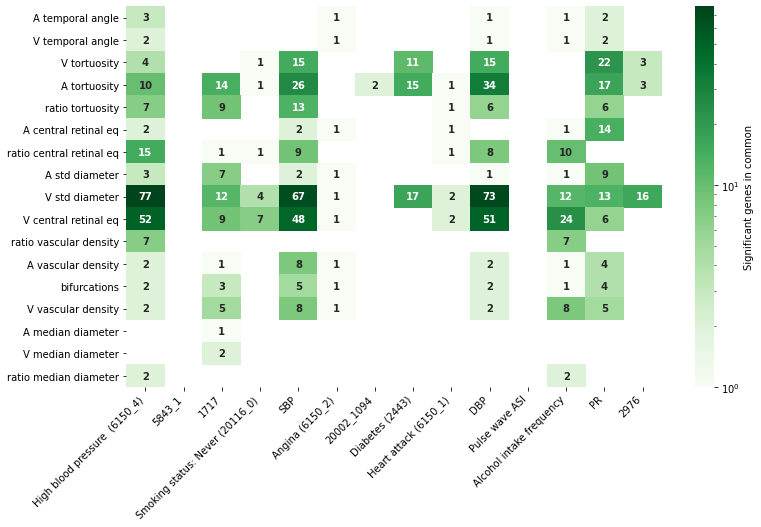

In [35]:
plt.rcParams['font.size'] = '10'
#figsize_val_2=(5, 7)
figsize_val_2=(12, 7)
df_file_proper_format_plots = df_file_form_2 #[list(diseases_traits_old)]
fig, ax = plt.subplots(figsize=figsize_val_2)

fig1 = sns.heatmap(df_file_proper_format_plots, annot=True, fmt=".0f", cbar=True, 
             annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots).min().max(), 
            vmax=abs(df_file_proper_format_plots).max().max(), 
            cmap='Greens',alpha=1.0, cbar_kws={'label': 'Significant genes in common'}, 
            norm=LogNorm())
plt.xticks(rotation=45, ha='right')

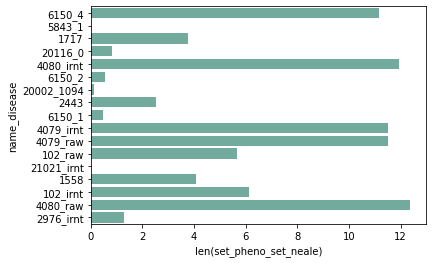

In [ ]:
#df_genes_neale_intersection['len(set_pheno_set_neale)']
# plot a bar chart
sns.barplot(
    x="len(set_pheno_set_neale)", 
    y="name_disease", 
    data=df_genes_neale_intersection, 
    ci=None, 
    color='#69b3a2');

In [ ]:
#df_genes_count[df_genes_count['Unnamed: 0']=='CTD-2008P7.9']